## Week 2 Review

Topics:



In [99]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# caller = imp.load_source('caller', '/Users/kiefer/github-repos/DSI-SF-4/utils/student_caller/caller.py')
# sc = caller.StudentCaller()
# sc.load_resource(resource='students')

In [12]:


d = pd.read_csv('/Users/tyronewilliams/Desktop/DSI-SF-4/datasets/pretrial_inmates_ct/accused_pretrial_inmates_ct.csv')

In [13]:
d.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,07/01/2016,ZZEBBEWZ,06/17/2016,WHITE,M,63,5000,"ASSAULT, THIRD DEGREE AM",CORRIGAN CI,NONE
1,07/01/2016,ZZEBBRZC,06/30/2016,BLACK,M,42,500,"FAILURE TO APPEAR, SECOND DEGREE AM",HARTFORD CC,NONE
2,07/01/2016,ZZEBCBHC,06/06/2016,WHITE,M,60,40000,EVADING RESPONSIBILITY M,HARTFORD CC,NONE
3,07/01/2016,ZZEBCCWL,04/25/2016,HISPANIC,M,44,125000,CRIMINAL POSSESSION OF A PISTOL DF,HARTFORD CC,NONE
4,07/01/2016,ZZEBCHBZ,06/21/2016,HISPANIC,M,58,2500,BREACH OF PEACE BM,CORRIGAN CI,NONE


In [14]:
d.OFFENSE.unique()

array(['ASSAULT, THIRD DEGREE                 AM',
       'FAILURE TO APPEAR, SECOND DEGREE      AM',
       'EVADING RESPONSIBILITY                 M',
       'CRIMINAL POSSESSION OF A PISTOL       DF',
       'BREACH OF PEACE                       BM',
       'VIOLATION OF PROBATION OR COND DISCHG',
       'CARRYING WEAPONS WITHOUT A PERMIT      F',
       'STRANGULATION 2ND DEGREE              DF',
       'SALE OF HEROIN, COC BY NON-DEPENDENT',
       'ASSAULT, FIRST DEGREE                 BF',
       'SALE OF CONTROLLED SUBSTANCE           F',
       'ARSON, FIRST DEGREE                   AF',
       'CRIM VIOL OF PROTECTIVE ORDER         DF',
       'EMPLOYING MINOR IN OBSCENE PERFORMNCE AF',
       'ASSAULT, SECOND DEGREE                DF',
       'ROBBERY, FIRST DEGREE                 BF',
       'SEXUAL ASSAULT, FIRST DEGREE           F',
       'SALE OF NARC/AMPHET BY NON-DEPENDENT   F',
       'ROBBERY, THIRD DEGREE                 DF',
       'POSSESSION OF NARCOTICS',
    

In [27]:
#1. WHat is the mean and STD of age by gender
age_by_gender = pd.pivot_table(data =d, columns='GENDER', values="AGE", aggfunc= [np.mean, np.std])

abg_reset = age_by_gender.reset_index()

abg_reset

,GENDER,mean,std
0,F,33.660816,10.165089
1,M,33.629099,11.334901


In [28]:
#2. for age_by_gender and abg_reset get out the value of male mean age
age_by_gender.loc['M','mean']

33.629099229968247

In [29]:
abg_reset['mean'][abg_reset["GENDER"]== "M"]

1    33.629099
Name: mean, dtype: float64

In [37]:
abg_reset[abg_reset["GENDER"]=="M"]['mean']

1    33.629099
Name: mean, dtype: float64

In [ ]:
#3 get mean and STD of age by race(with split-apply combine)

In [58]:
mean_race = d.groupby(["RACE"])["AGE"].mean().reset_index()
mean_race

,RACE,AGE
0,AMER IND,32.207354
1,ASIAN,34.999482
2,BLACK,32.217038
3,HISPANIC,32.799393
4,WHITE,35.844300


In [59]:
std_race = d.groupby(["RACE"])["AGE"].std().reset_index()
std_race

,RACE,AGE
0,AMER IND,8.101409
1,ASIAN,11.888450
2,BLACK,11.262700
3,HISPANIC,10.413491
4,WHITE,11.419087


In [51]:
mean_race_combined = d.groupby(["RACE"])["AGE"].agg([np.std,np.mean]).reset_index()
mean_race_combined

,RACE,std,mean
0,AMER IND,8.101409,32.207354
1,ASIAN,11.888450,34.999482
2,BLACK,11.262700,32.217038
3,HISPANIC,10.413491,32.799393
4,WHITE,11.419087,35.844300


In [ ]:
# combine mean_race and std_race into a single data frame

In [70]:
mean_race.merge(std_race,on="RACE")

,RACE,AGE_x,AGE_y
0,AMER IND,32.207354,8.101409
1,ASIAN,34.999482,11.888450
2,BLACK,32.217038,11.262700
3,HISPANIC,32.799393,10.413491
4,WHITE,35.844300,11.419087


In [72]:
pd.merge(mean_race,std_race, how="outer", on="RACE", suffixes=['__MEAN',"__STD"])

,RACE,AGE__MEAN,AGE__STD
0,AMER IND,32.207354,8.101409
1,ASIAN,34.999482,11.888450
2,BLACK,32.217038,11.262700
3,HISPANIC,32.799393,10.413491
4,WHITE,35.844300,11.419087


In [75]:
#4 Mean age and mean Bond amount for gender-by race
d.groupby(["GENDER","RACE"]).agg({"AGE":np.mean,"BOND AMOUNT":np.mean})

AGE    BOND AMOUNT
GENDER RACE                              
F      AMER IND  39.061372   73394.584838
       ASIAN     32.409357   64035.657895
       BLACK     33.482964  110086.211640
       HISPANIC  32.014262  151820.763202
       WHITE     34.304306   94180.795646
M      AMER IND  29.502849  107540.384615
       ASIAN     35.556954  163587.319069
       BLACK     32.129487  263885.782629
       HISPANIC  32.867327  203990.422943
       WHITE     36.133428  127555.353206

In [77]:
#5 Mean age and mean Bond amount for gender-by race
d.groupby(["GENDER","RACE"])[["AGE","BOND AMOUNT"]].agg(np.mean).reset_index()

,GENDER,RACE,AGE,BOND AMOUNT
0,F,AMER IND,39.061372,73394.584838
1,F,ASIAN,32.409357,64035.657895
2,F,BLACK,33.482964,110086.211640
3,F,HISPANIC,32.014262,151820.763202
4,F,WHITE,34.304306,94180.795646
5,M,AMER IND,29.502849,107540.384615
6,M,ASIAN,35.556954,163587.319069
7,M,BLACK,32.129487,263885.782629
8,M,HISPANIC,32.867327,203990.422943
9,M,WHITE,36.133428,127555.353206


In [ ]:
#Create a new column  "offence_code if it exists

In [78]:
d["OFFENSE"]

0         ASSAULT, THIRD DEGREE                 AM
1         FAILURE TO APPEAR, SECOND DEGREE      AM
2         EVADING RESPONSIBILITY                 M
3         CRIMINAL POSSESSION OF A PISTOL       DF
4         BREACH OF PEACE                       BM
5            VIOLATION OF PROBATION OR COND DISCHG
6         CARRYING WEAPONS WITHOUT A PERMIT      F
7         STRANGULATION 2ND DEGREE              DF
8             SALE OF HEROIN, COC BY NON-DEPENDENT
9         ASSAULT, FIRST DEGREE                 BF
10        SALE OF CONTROLLED SUBSTANCE           F
11        ARSON, FIRST DEGREE                   AF
12        CRIM VIOL OF PROTECTIVE ORDER         DF
13        EMPLOYING MINOR IN OBSCENE PERFORMNCE AF
14        ASSAULT, SECOND DEGREE                DF
15           VIOLATION OF PROBATION OR COND DISCHG
16        ROBBERY, FIRST DEGREE                 BF
17        SEXUAL ASSAULT, FIRST DEGREE           F
18        SALE OF NARC/AMPHET BY NON-DEPENDENT   F
19        ROBBERY, FIRST DEGREE

In [102]:
def remove_final(x):
    if " " in x[-3:]:
        return x[-2:]
    else:
        return np.nan

d["OFFENSE"].apply(remove_final)
    

0          AM
1          AM
2           M
3          DF
4          BM
5         NaN
6           F
7          DF
8         NaN
9          BF
10          F
11         AF
12         DF
13         AF
14         DF
15        NaN
16         BF
17          F
18          F
19         BF
20         DF
21        NaN
22          F
23        NaN
24          F
25         DF
26         DF
27          F
28         AM
29         CF
         ... 
346452    NaN
346453    NaN
346454    NaN
346455    NaN
346456     DF
346457     DF
346458     DF
346459     AF
346460     BM
346461     BF
346462     DF
346463     DF
346464    NaN
346465      F
346466    NaN
346467     AF
346468     DF
346469     BM
346470    NaN
346471      F
346472    NaN
346473     DF
346474     DF
346475    NaN
346476     AM
346477     BF
346478    NaN
346479     DF
346480      F
346481     CF
Name: OFFENSE, dtype: object

In [ ]:
#make a "long-format" datafram with identified as the 
# id column and the data on the race, gender , age , offense code

In [107]:
subset_long = pd.melt(d, id_vars="IDENTIFIER", value_vars=["RACE","AGE","GENDER"])
subset_long

,IDENTIFIER,variable,value
0,ZZEBBEWZ,RACE,WHITE
1,ZZEBBRZC,RACE,BLACK
2,ZZEBCBHC,RACE,WHITE
3,ZZEBCCWL,RACE,HISPANIC
4,ZZEBCHBZ,RACE,HISPANIC
5,ZZEBCHHE,RACE,BLACK
6,ZZEBCLLR,RACE,WHITE
7,ZZEBCLWL,RACE,BLACK
8,ZZEBCSHZ,RACE,BLACK
9,ZZEBCSZS,RACE,BLACK


In [115]:
#kinds of facilities
list1 = d["FACILITY"].unique()

In [155]:
#group by offense, gender, race
gdf_1 = d.groupby(["OFFENSE","RACE","GENDER"]).count().reset_index()
gdf_1.sort_values(by = "OFFENSE", ascending=False)

,OFFENSE,RACE,GENDER,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,AGE,BOND AMOUNT,FACILITY,DETAINER
822,YOUTHFUL OFFENDER,WHITE,M,259,259,259,259,259,259,259
821,YOUTHFUL OFFENDER,WHITE,F,27,27,27,27,27,27,27
820,YOUTHFUL OFFENDER,HISPANIC,M,567,567,567,567,567,567,567
819,YOUTHFUL OFFENDER,HISPANIC,F,81,81,81,81,81,81,81
818,YOUTHFUL OFFENDER,BLACK,M,2096,2096,2096,2096,2096,2096,2096
817,YOUTHFUL OFFENDER,BLACK,F,9,9,9,9,9,9,9
816,VOYEURISM,HISPANIC,M,3,3,3,3,3,3,3
815,VOYEURISM,ASIAN,M,1,1,1,1,1,1,1
810,VIOLATION OF PROBATION OR COND DISCHG,BLACK,M,11597,11597,11597,11597,11597,11597,11597
806,VIOLATION OF PROBATION OR COND DISCHG,AMER IND,F,45,45,45,45,45,45,45


In [156]:
# sort by offense count within multi-index dataframe
gdf = d.groupby(["GENDER","RACE"]).count()
gdf.sort_index(level= ["GENDER","RACE"], ascending=[False,True])

DOWNLOAD DATE  IDENTIFIER  LATEST ADMISSION DATE     AGE  \
GENDER RACE                                                                 
M      AMER IND            702         702                    702     702   
       ASIAN              1589        1589                   1589    1589   
       BLACK            126461      126461                 126461  126461   
       HISPANIC          81848       81848                  81848   81848   
       WHITE            100556      100556                 100556  100556   
F      AMER IND            277         277                    277     277   
       ASIAN               342         342                    342     342   
       BLACK              8746        8746                   8746    8746   
       HISPANIC           7082        7082                   7082    7082   
       WHITE             18879       18879                  18879   18879   

                 BOND AMOUNT  OFFENSE  FACILITY  \
GENDER RACE                                       
M      AMER IND          702      702       702   
       ASIAN            1589     1589      1589   
       BLACK          126461   126461    126461   
       HISPANIC        81848    81848     81848   
       WHITE          100556   100556    100556   
F      AMER IND          277      277       277   
       ASIAN             342      342       342   
       BLACK            8746     8746      8746   
       HISPANIC         7082     7082      7082   
       WHITE           18879    18879     18879   

                 DETAINER                                          
GENDER RACE                                                        
M      AMER IND                                               702  
       ASIAN                                                 1589  
       BLACK                                               126461  
       HISPANIC                                             81848  
       WHITE                                               100556  
F      AMER IND                                               277  
       ASIAN                                                  342  
       BLACK                                                 8746  
       HISPANIC                                              7082  
       WHITE                                                18879

In [161]:
gdf.sort_values(by="OFFENSE", ascending=[False]).sort_index(level= "GENDER", ascending=False)

DOWNLOAD DATE  IDENTIFIER  LATEST ADMISSION DATE     AGE  \
GENDER RACE                                                                 
M      WHITE            100556      100556                 100556  100556   
       HISPANIC          81848       81848                  81848   81848   
       BLACK            126461      126461                 126461  126461   
       ASIAN              1589        1589                   1589    1589   
       AMER IND            702         702                    702     702   
F      WHITE             18879       18879                  18879   18879   
       HISPANIC           7082        7082                   7082    7082   
       BLACK              8746        8746                   8746    8746   
       ASIAN               342         342                    342     342   
       AMER IND            277         277                    277     277   

                 BOND AMOUNT  OFFENSE  FACILITY  \
GENDER RACE                                       
M      WHITE          100556   100556    100556   
       HISPANIC        81848    81848     81848   
       BLACK          126461   126461    126461   
       ASIAN            1589     1589      1589   
       AMER IND          702      702       702   
F      WHITE           18879    18879     18879   
       HISPANIC         7082     7082      7082   
       BLACK            8746     8746      8746   
       ASIAN             342      342       342   
       AMER IND          277      277       277   

                 DETAINER                                          
GENDER RACE                                                        
M      WHITE                                               100556  
       HISPANIC                                             81848  
       BLACK                                               126461  
       ASIAN                                                 1589  
       AMER IND                                               702  
F      WHITE                                                18879  
       HISPANIC                                              7082  
       BLACK                                                 8746  
       ASIAN                                                  342  
       AMER IND                                               277

In [ ]:
#reset the index, group by gender, select only gender subgroup female or "F"

In [171]:
gdf = gdf.reset_index()


In [176]:
cdf = gdf.groupby("GENDER")
cdf.get_group("F")

,index,GENDER,RACE,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,0,F,AMER IND,277,277,277,277,277,277,277,277
1,1,F,ASIAN,342,342,342,342,342,342,342,342
2,2,F,BLACK,8746,8746,8746,8746,8746,8746,8746,8746
3,3,F,HISPANIC,7082,7082,7082,7082,7082,7082,7082,7082
4,4,F,WHITE,18879,18879,18879,18879,18879,18879,18879,18879


In [ ]:
#plot a histogram of the bond amount

In [180]:
d["BOND AMOUNT"].describe()

count    3.464820e+05
mean     1.936252e+05
std      3.452201e+05
min      1.000000e+00
25%      2.500000e+04
50%      8.000000e+04
75%      2.000000e+05
max      5.050000e+06
Name: BOND AMOUNT, dtype: float64

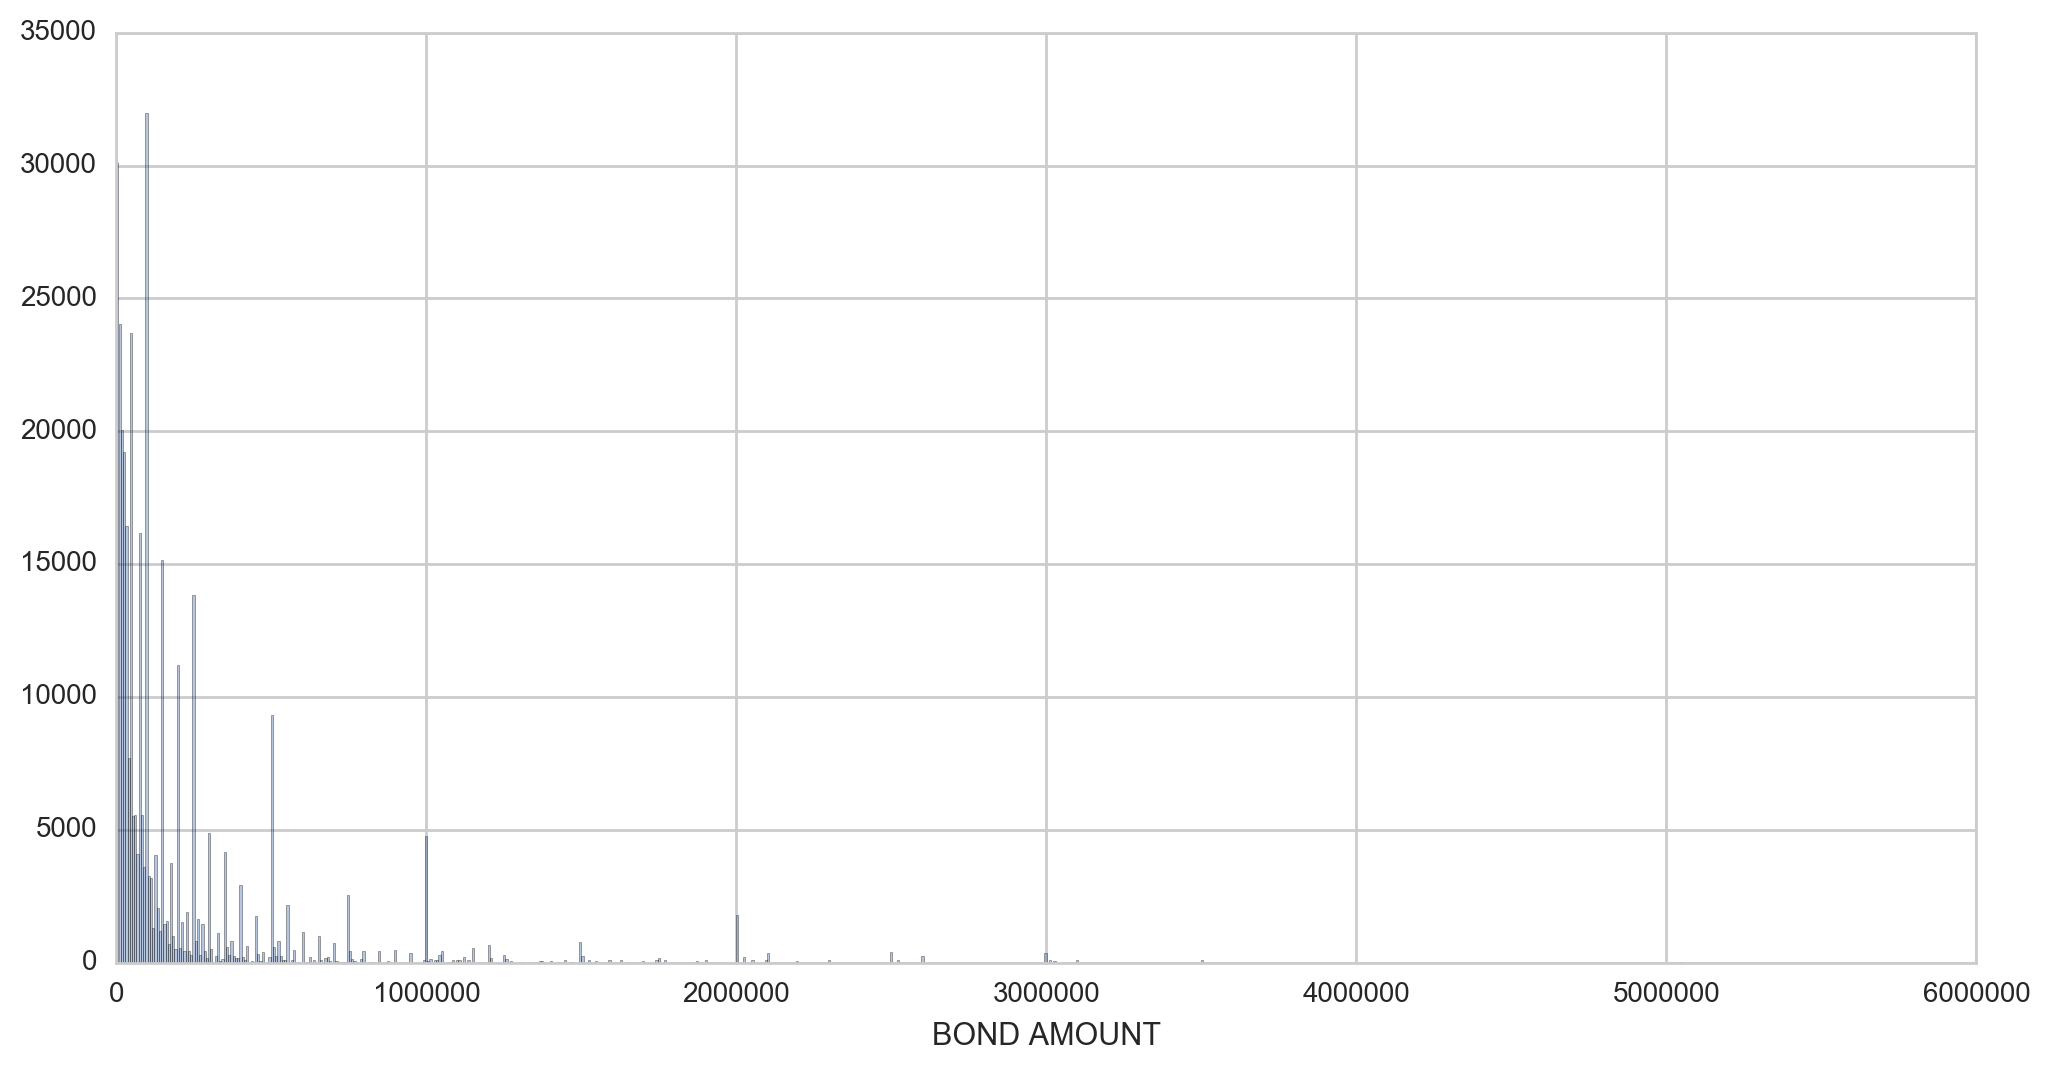

In [187]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.distplot(d["BOND AMOUNT"],kde=False, ax =ax, bins=700)

(0, 1000000)

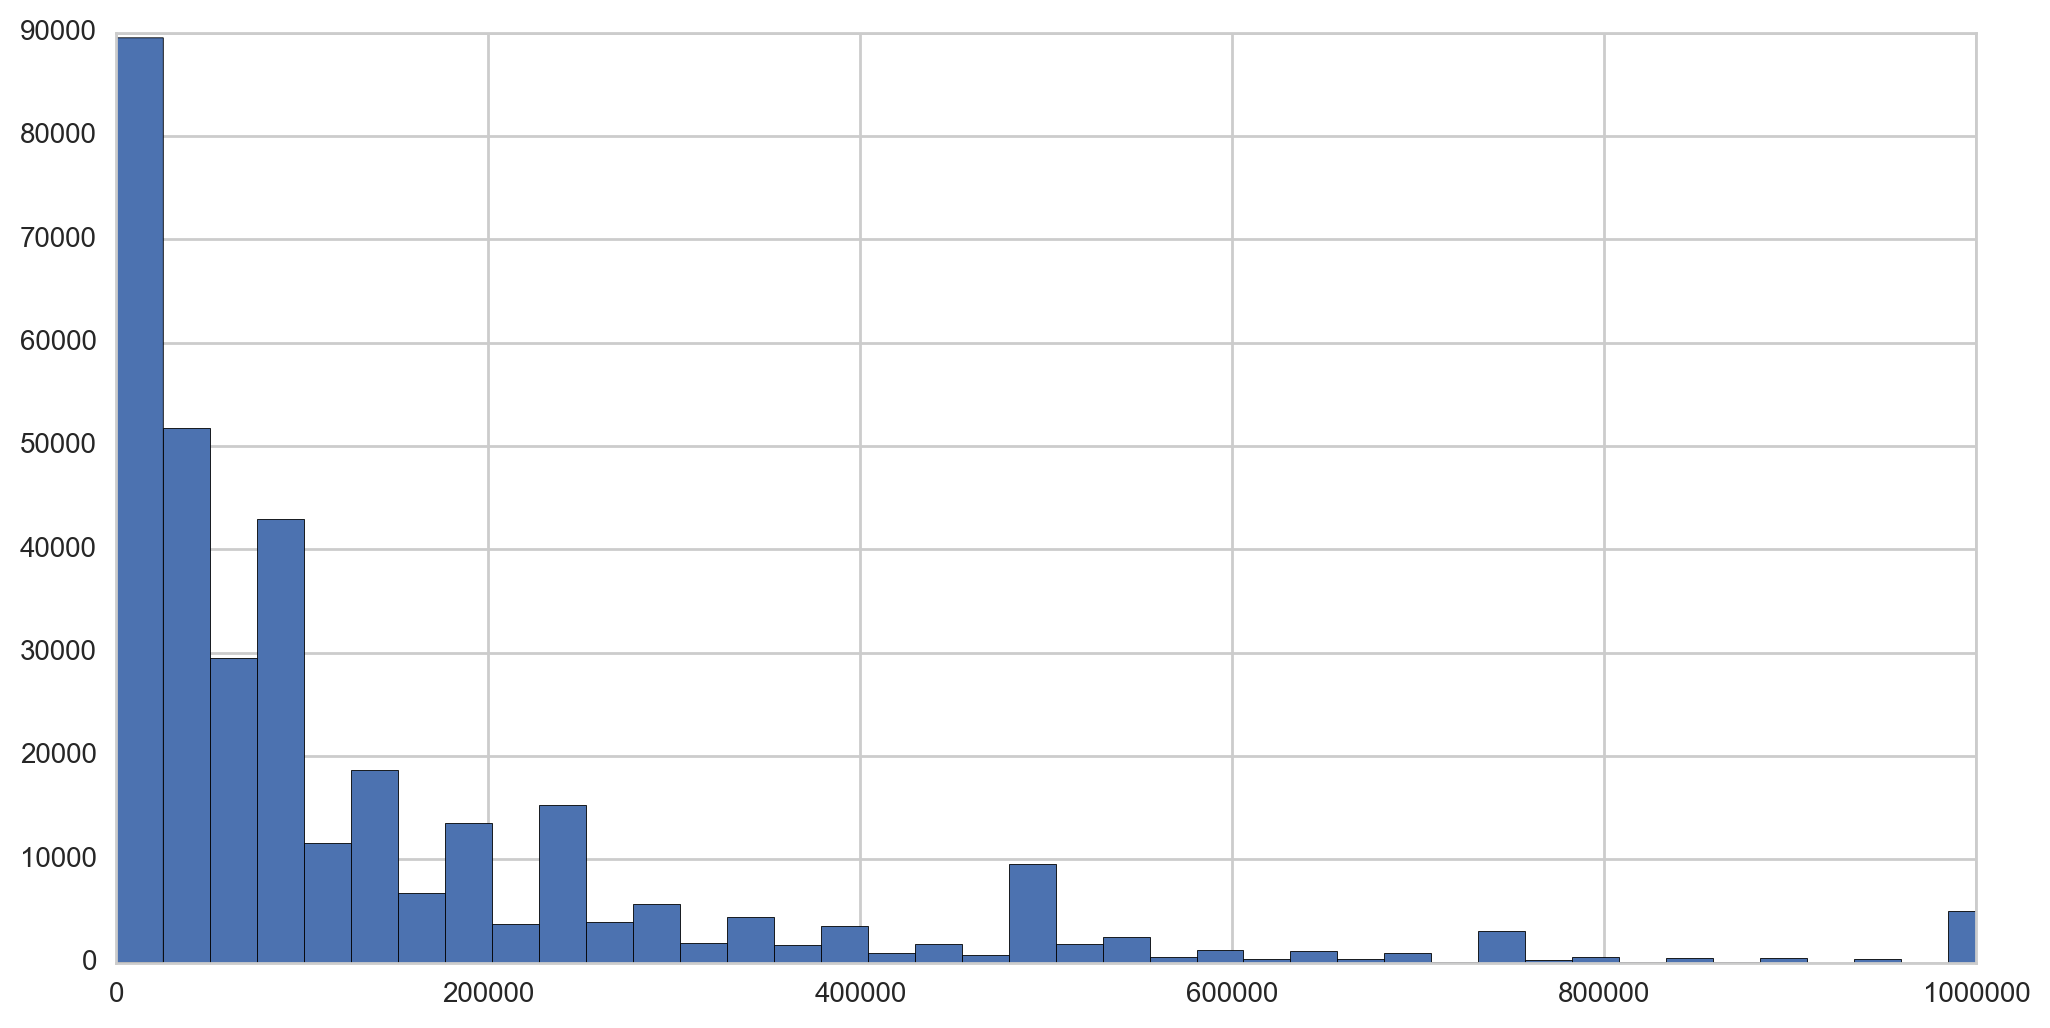

In [194]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.hist(d["BOND AMOUNT"], bins = 200, alpha=1)
ax.set_xlim([0,1000000])

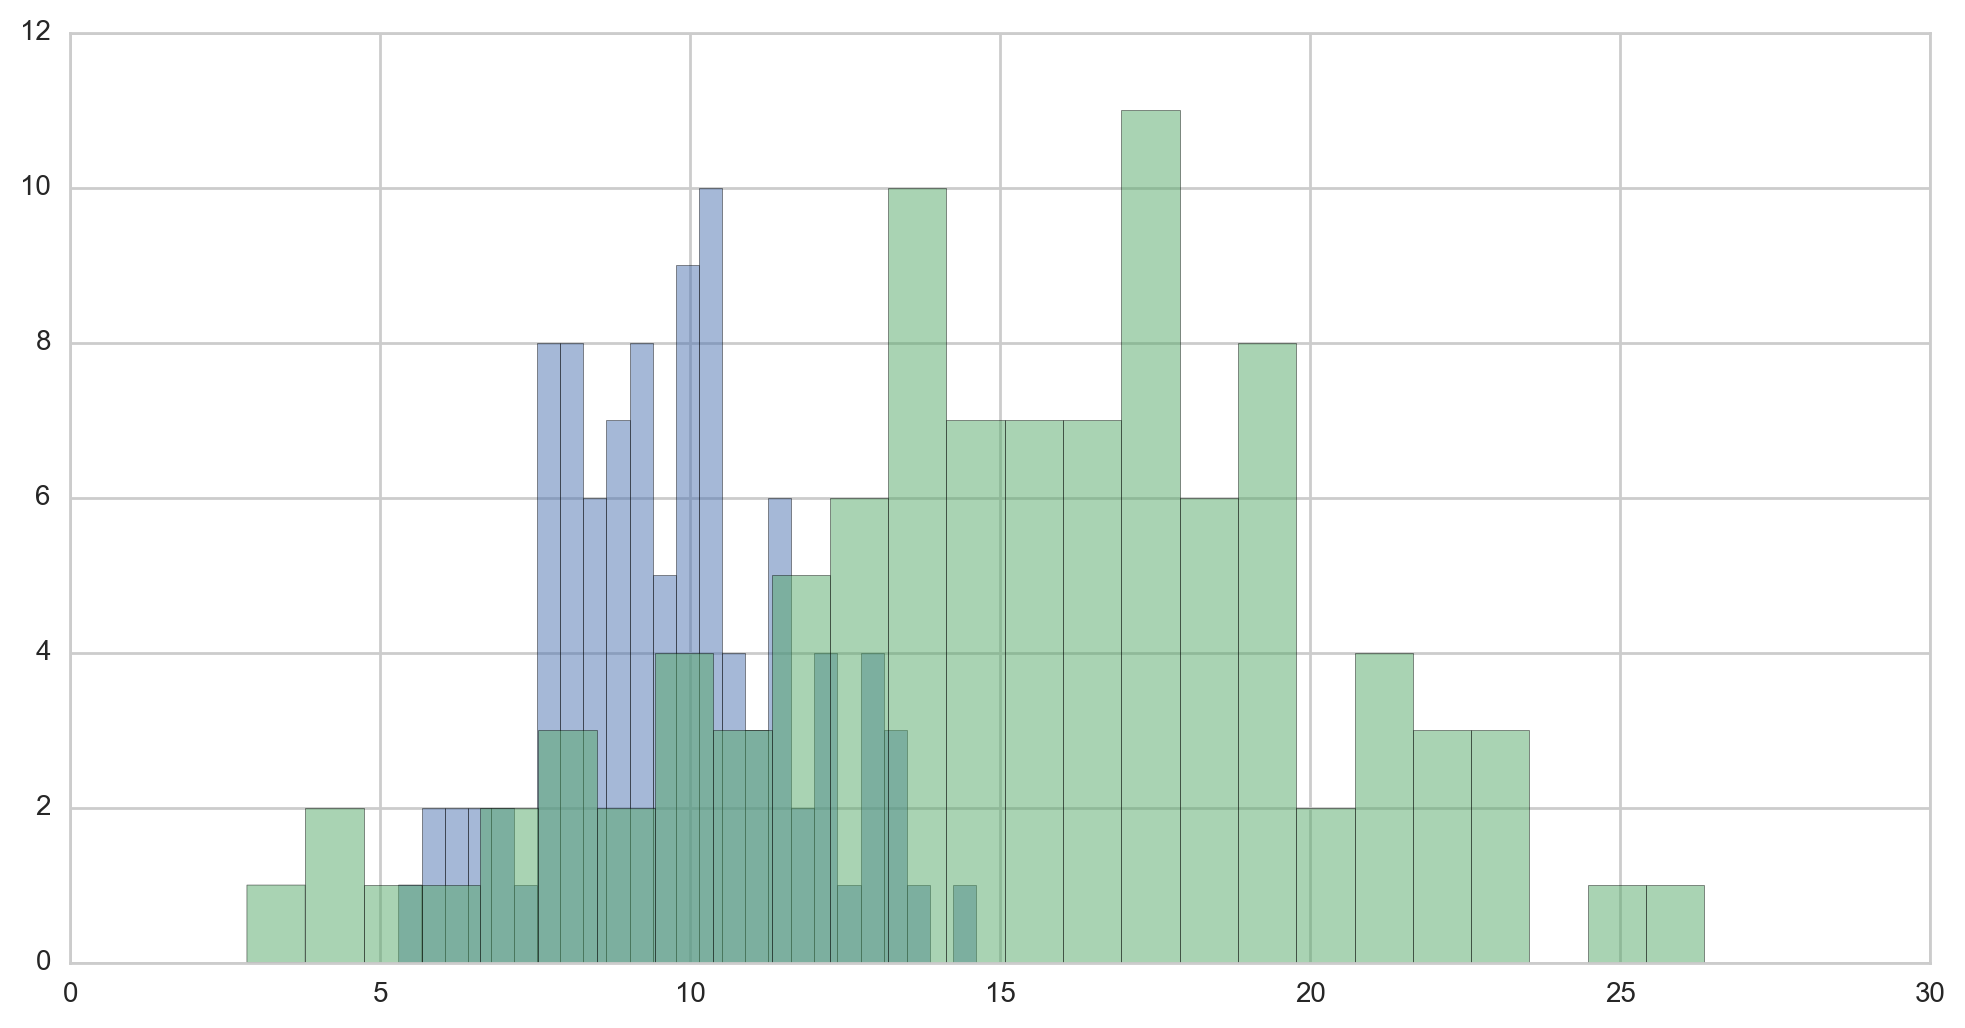

In [200]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.hist(np.random.normal(10,2,size=100), bins = 25, alpha=0.5)
ax.hist(np.random.normal(15,5,size=100), bins = 25, alpha=0.5)
plt.show()

In [ ]:
#Plot age dist of white and hispanic on the same chart

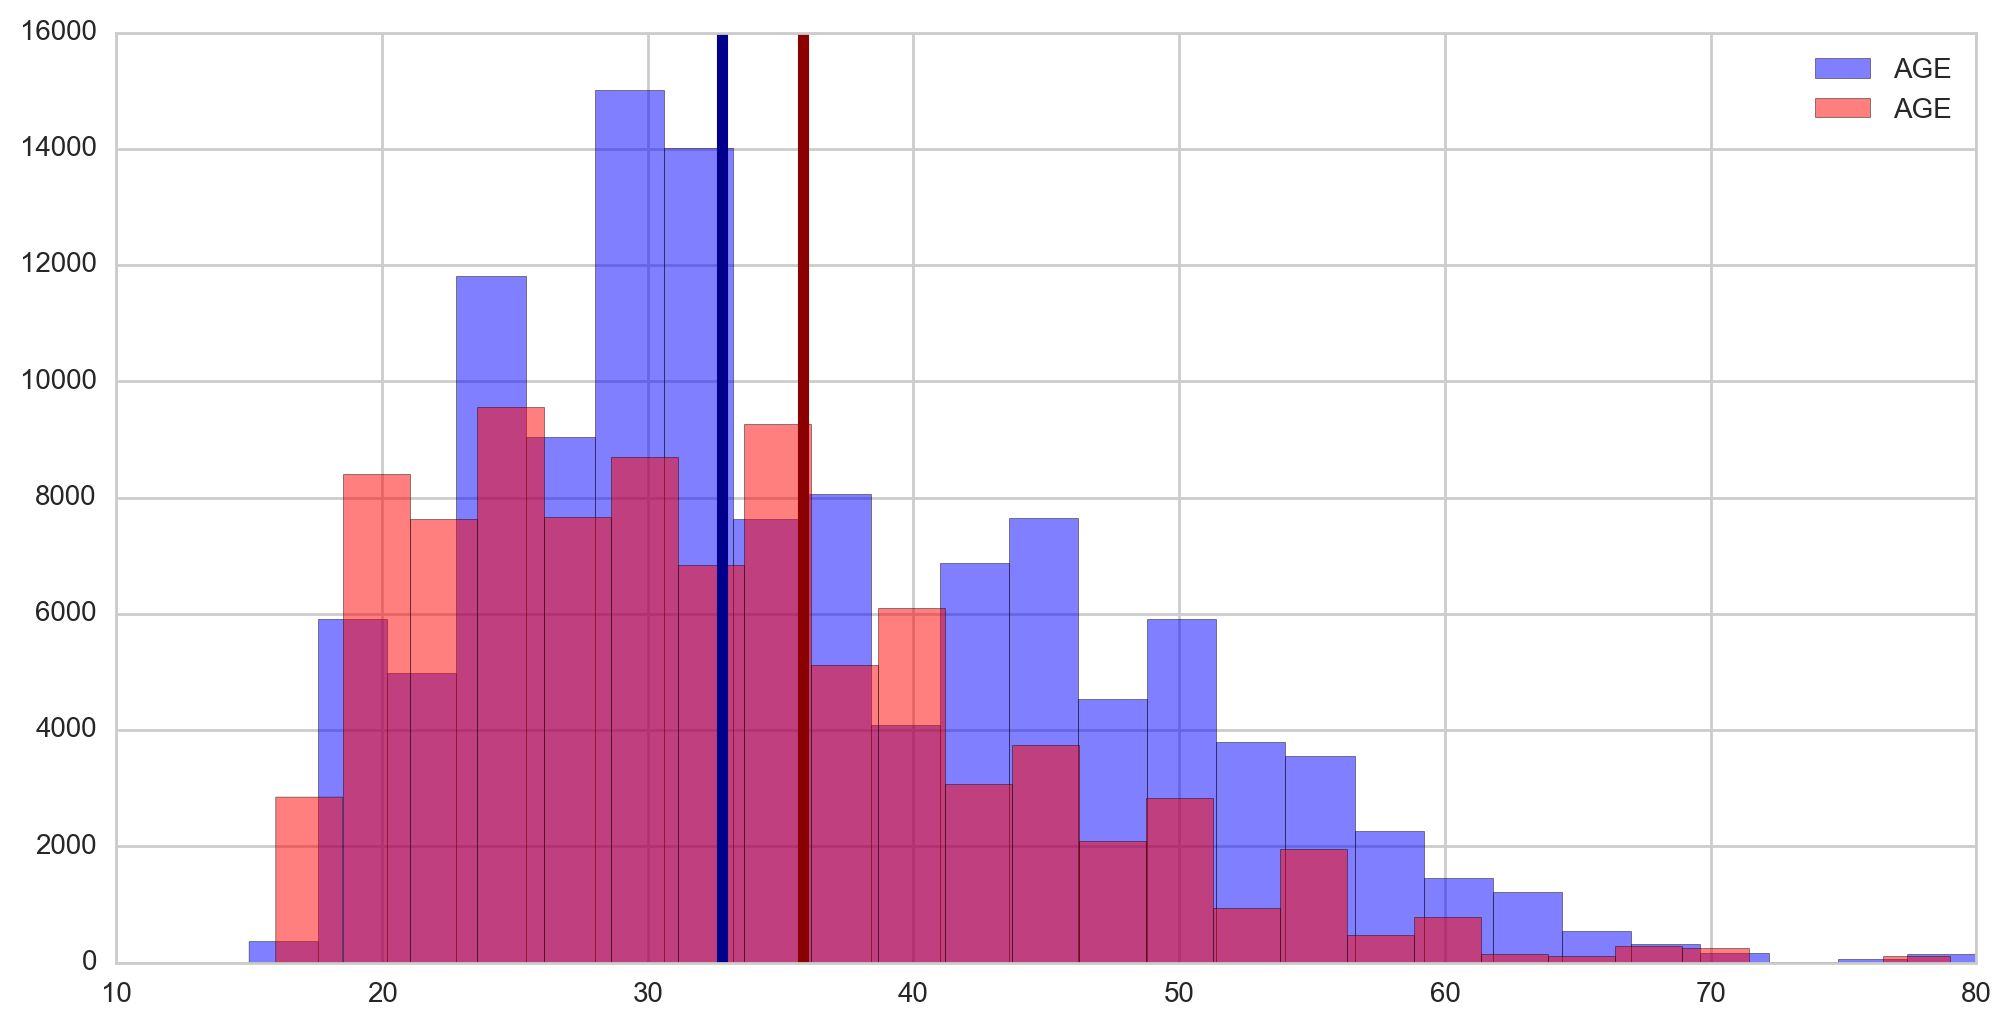

In [216]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
white = d[d["RACE"]=="WHITE"]["AGE"]
hispanic = d[d["RACE"]=="HISPANIC"]["AGE"]

ax.hist(white, alpha =0.5, color = "blue", bins = 25)
ax.hist(hispanic, alpha =0.5, color="red", bins = 25)
ax.legend(loc="upper right")
ax.axvline(x=np.mean(white),lw =4, color="darkred")
ax.axvline(x=np.mean(hispanic),lw =4, color="darkblue")

In [209]:
white.describe()

count    119435.000000
mean         35.844300
std          11.419087
min          15.000000
25%          27.000000
50%          33.000000
75%          44.000000
max          80.000000
Name: AGE, dtype: float64

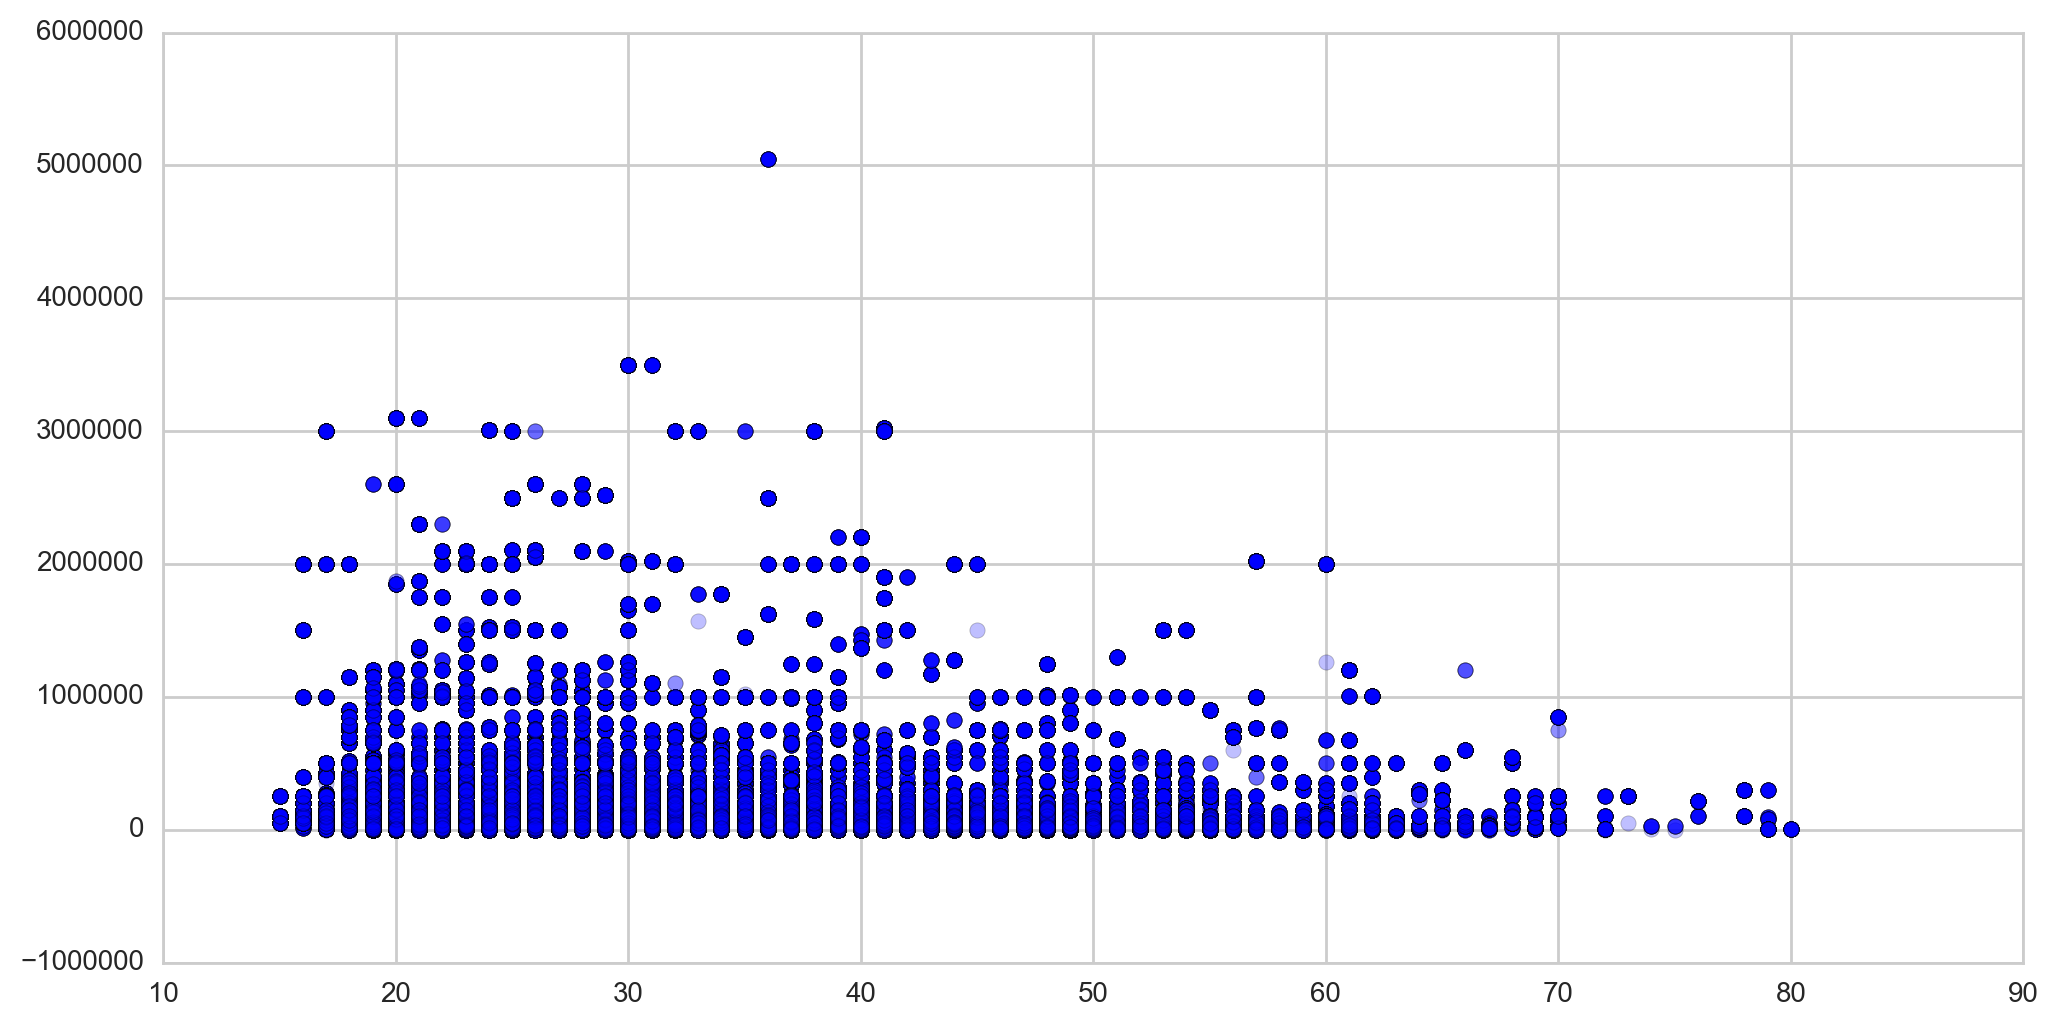

In [217]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.scatter(x=d.AGE, y=d["BOND AMOUNT"], s=30, alpha=0.25)

In [ ]:
#create a scatter comparing Age vs bond amount ASIAN, HISPANIC , and AMER IND

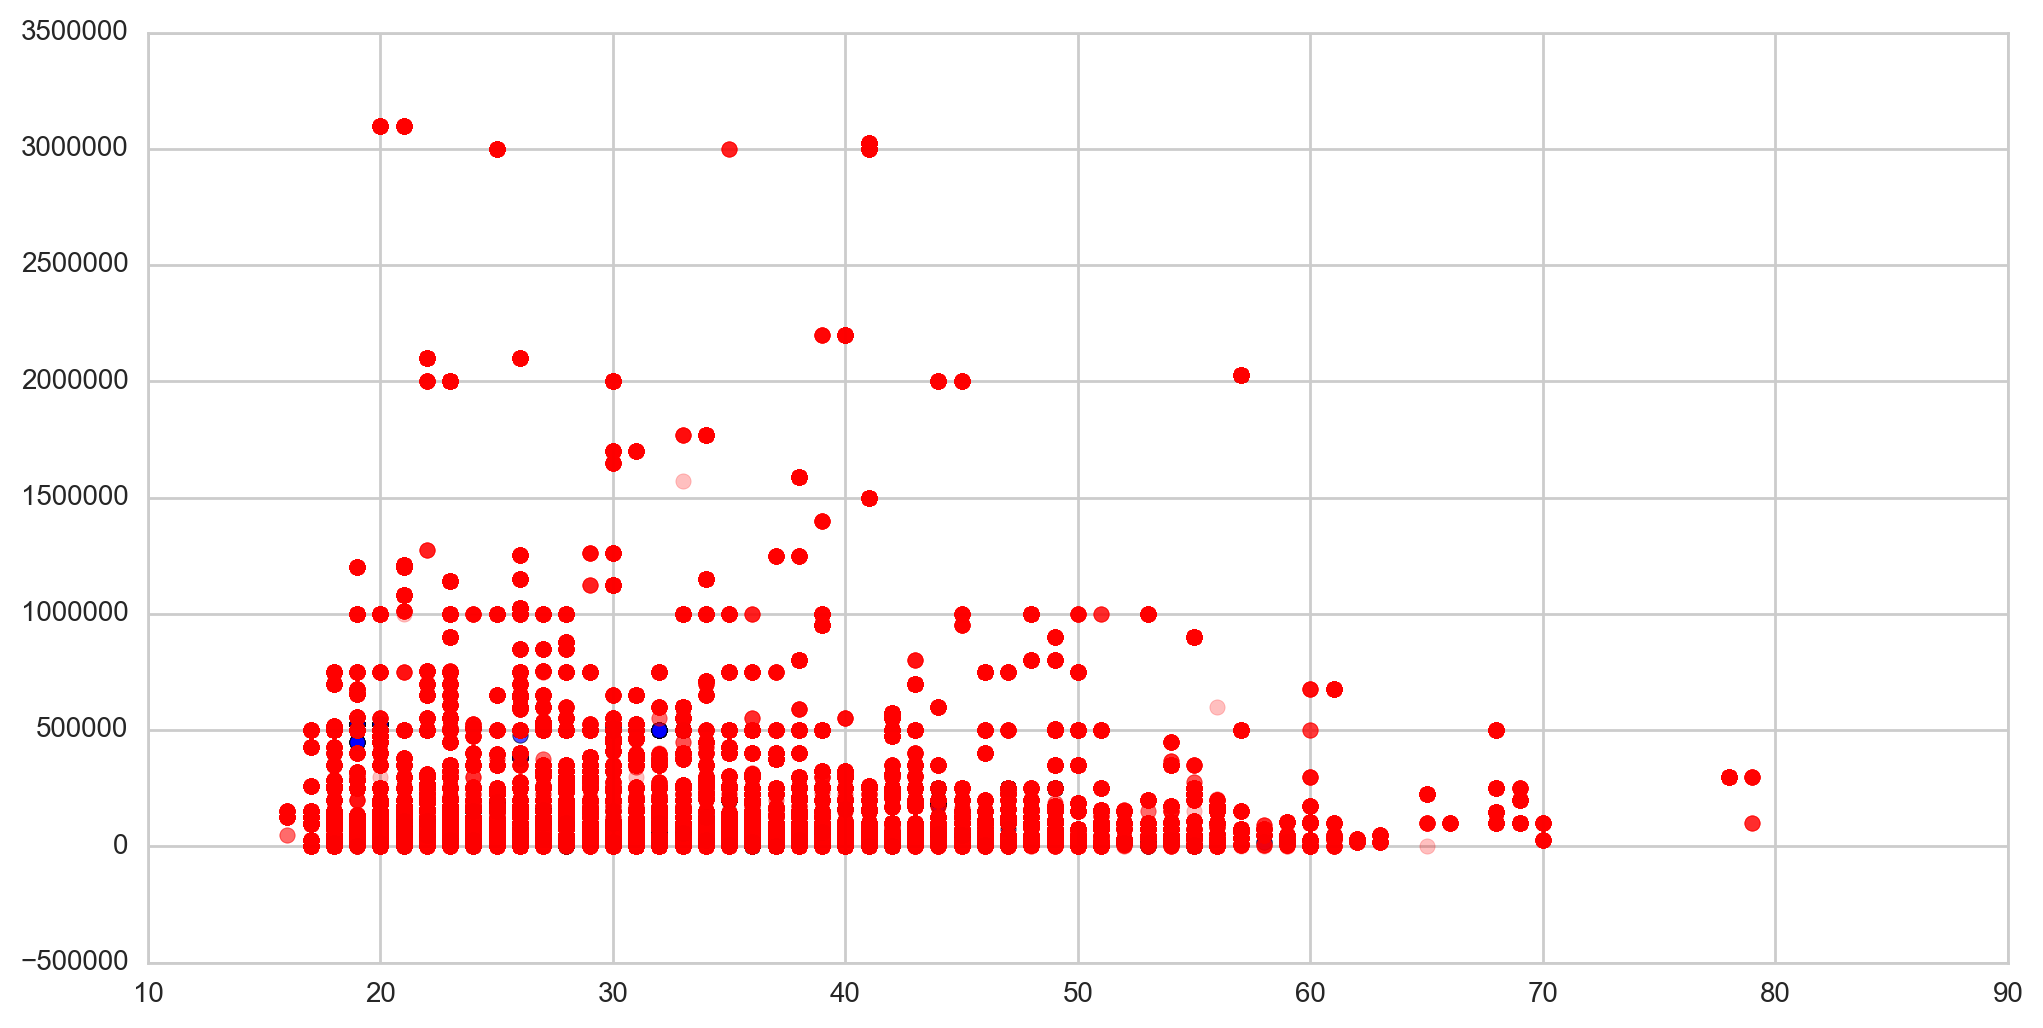

In [224]:
asian = d[d["RACE"]=="ASIAN"]["BOND AMOUNT"]
hisp = d[d["RACE"]=="HISPANIC"]["BOND AMOUNT"]
ind = d[d["RACE"]=="AMER IND"]["BOND AMOUNT"]

asian_1 = d[d["RACE"]=="ASIAN"]["AGE"]
hisp_1 = d[d["RACE"]=="HISPANIC"]["AGE"]
ind_1 = d[d["RACE"]=="AMER IND"]["AGE"]



fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.scatter(x=asian_1, y=asian, s=30, alpha=0.25)
ax.scatter(x=hisp_1, y=hisp, s=30, alpha=0.25, color ="red")

In [269]:


asian_2 = d[d["RACE"]=="ASIAN"]["BOND AMOUNT"]
hisp_2 = d[d["RACE"]=="HISPANIC"]["BOND AMOUNT"]
ind_2 = d[d["RACE"]=="AMER IND"]["BOND AMOUNT"]


asian_3 = d[d["RACE"]=="ASIAN"]["FACILITY"]
hisp_3 = d[d["RACE"]=="HISPANIC"]["FACILITY"]
ind_3 = d[d["RACE"]=="AMER IND"]["FACILITY"]





ValueError: Could not interpret input 'BOND'

In [273]:
new_data = d.groupby(["FACILITY","RACE"]).count()
new_data

DOWNLOAD DATE  IDENTIFIER  \
FACILITY            RACE                                  
BRIDGEPORT CC       AMER IND            151         151   
                    ASIAN               160         160   
                    BLACK             28017       28017   
                    HISPANIC          15949       15949   
                    WHITE             17398       17398   
CHESHIRE CI         BLACK               432         432   
                    HISPANIC            692         692   
                    WHITE               310         310   
CORRIGAN CI         AMER IND             52          52   
                    ASIAN               179         179   
                    BLACK              9295        9295   
                    HISPANIC           7493        7493   
                    WHITE             16839       16839   
D KIMBALL HSP       WHITE                 2           2   
ENFIELD CI          BLACK                48          48   
                    WHITE                 2           2   
FEDERAL MARSHAL     BLACK                31          31   
                    HISPANIC             26          26   
GARNER              AMER IND            168         168   
                    ASIAN               111         111   
                    BLACK              4101        4101   
                    HISPANIC           1748        1748   
                    WHITE              4694        4694   
HARTFORD CC         AMER IND            189         189   
                    ASIAN               325         325   
                    BLACK             24454       24454   
                    HISPANIC          22681       22681   
                    WHITE             24900       24900   
HARTFORD HOSP       HISPANIC              2           2   
                    WHITE                 9           9   
...                                     ...         ...   
NORTHERN CI         HISPANIC           4756        4756   
                    WHITE              2651        2651   
OSBORN CI           ASIAN               140         140   
                    BLACK              1386        1386   
                    HISPANIC            655         655   
                    WHITE              1610        1610   
ROBINSON CI         BLACK                87          87   
                    HISPANIC            120         120   
                    WHITE                57          57   
ST MARYS HOSP       WHITE                 8           8   
ST VINC HOSP        BLACK                 4           4   
                    WHITE                16          16   
UCONN HOSP          BLACK                10          10   
                    HISPANIC             16          16   
                    WHITE               114         114   
WALKER RC           ASIAN               109         109   
                    BLACK              5640        5640   
                    HISPANIC           3073        3073   
                    WHITE              1823        1823   
WATERBRY HOSP       BLACK                 1           1   
                    WHITE                 7           7   
WILLARD-CYBULSKI CI BLACK                11          11   
                    WHITE                99          99   
YALE/N.H.HOSP       BLACK                 5           5   
                    WHITE                21          21   
YORK CI             AMER IND            277         277   
                    ASIAN               342         342   
                    BLACK              8662        8662   
                    HISPANIC           7066        7066   
                    WHITE             18830       18830   

                              LATEST ADMISSION DATE  GENDER    AGE  \
FACILITY            RACE                                             
BRIDGEPORT CC       AMER IND                    151     151    151   
                    ASIAN                       160     160    160   
                    BLACK       